In [3]:
import os
import sys

cwd0 = '../config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Thursday 03 November 2022, 17:07:53  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="../config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

###  **Exercices**. Statistiques et régression.<br>Corrigé

#### Importation des modules

In [29]:
# exécutez cette cellule, sans la modifier
%matplotlib inline
# lecture des data avec la fonction loadtxt de numpy & tracé du nuage de points
from pylab import *
# d'autres bibliothèques seront importées au fur et à mesure des besoins

<div class="rq">
    
On va à nouveau faire de l'ajustement de courbes. Pour citer [wikipedia](https://fr.wikipedia.org/wiki/Ajustement_de_courbe), "*c'est une technique d'analyse d'une courbe expérimentale, consistant à **construire une courbe à partir de fonctions mathématiques** et d'ajuster les paramètres de ces fonctions pour se **rapprocher de la courbe mesurée** — on parle donc aussi d'ajustement de paramètres. On utilise souvent le terme anglais curve fitting, profile fitting ou simplement **fitting**, pour désigner cette méthode ; on utilise souvent le franglais « fitter une courbe » pour dire « ajuster une courbe »*"
    
On va systématiquement tracer le **résidu** de cet ajustement, une mesure importante en statistiques. On a vu dans le cours que les <b>résidus</b> sont définis comme étant les différences entre les valeurs observées, $y(x_i)$, et les valeurs prédites par un modèle de régression,$\hat{y}(x_i)$ :

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

Les résidus $e(x_i)$ sont calculés pour chacun des points $x_i$ qui a servi à déterminer le modèle de régression.

    
L'**analyse graphique** des résidus $e(x_i)$ permet de vérifier qu'ils ne présentent aucune structure particulière, ce qui est une condition importante pour juger de la qualité du "*fit*".

</div>

#### **Exercice 1.** Régression linéaire
##### **1.** Lecture et visualisation des données

On va d'abord lire à l'aide de la fonction `loadtxt` le contenu d'un fichier `f2.csv`, qui est contenu dans le répertoire `data` (son chemin d'accès est donc `data/f2.csv`). Le fichier contient 100 couples de données  $x_i$ et $y_i$, rangés dans deux colonnes séparées par une marque de tabulation.
- le contenu des deux colonnes va être stocké dans deux variables `X` et `Y`.
- on va ensuite tracer `Y` en fonction de `X` avec les options `linestyle='', marker='o'` 

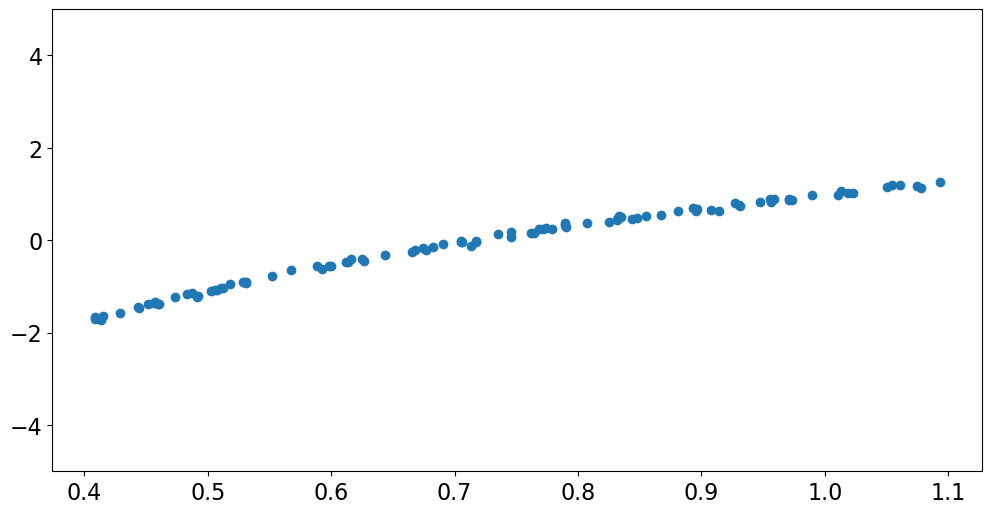

In [5]:
# définition de la taille de la figure et des polices de caractères
plt.rcParams["figure.figsize"] = (12,6) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
ylim(-5,5)

# corrigez le code python de la ligne ci-dessous
X, Y = loadtxt('data/f2.csv', delimiter='\t', unpack=True)

# entrez ci-dessous votre code python pour tracer Y en fonction de X
plot(X, Y,linestyle='', marker='o')

<div class="warn">
D'après ce tracé, il pourrait y avoir une relation linéaire entre les $y_i$ et les $x_i$. C'est ce qu'on va évaluer.
</div>

##### **2.** Régression linéaire

On va utliser la fonction `linregress` de la bibliothèque `scipy`. Elle retourne 5 valeurs, dans l'ordre suivant : la pente (`slope`), l'ordonnée à l'origine (`intercept`), le coefficient de corrélation (`rvalue`), l'erreur sur la pente (`stderr`), l'erreur sur l'ordonnée à l'origine (`intercept_stderr`).

- Après avoir appliqué `linregress`, afficher ces cinq quantités après les avoir récupérées dans les variables `a`, `b`, `r`, `stderr` et `istderr`.  Calculer puis afficher également le coefficient de détermination $R^2$ ("R-carré"), qui le carré du coefficient de corrélation.

- Quelle est l'équation de la fonction linéaire ? Pourquoi faut-il noter $y$ avec "un chapeau", $\hat{y}$ ?

- Prédire la valeur de $y$ si $x$ = 0,1

- Que pensez-vous de la qualité de cet ajustement ?

In [8]:
from scipy.stats import linregress

# ajouter le code pour appeler linregress
fit = linregress(x=X, y=Y)

# compléter ces lignes
a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

# ajouter le code pour afficher les valeurs de a, b, r, stderr, istderr et R2
print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR = {r:6.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

# ajouter ici le code pour prédire de la valeur de y pour x = 0,05
print()
print(f"x = 0.1 -> y = {a*0.1+b:.2f}")

a   =    4.291
b   =   -3.202
R =  0.990
R^2 =  0.980
Erreur standard sur la valeur de la pente =   0.062
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.046

x = 0.1 -> y = -2.77


<div class="warn">

L'équation de la droite qui passe au plus près de l'ensemble des points est de la forme $\hat{y}=ax+b$ avec $a$ = 4.291 et $b$ = -3.202.
    
Une relation linéaire vérifiée *simultanément* pour tous les couples de valeur $(x_i,y_i)$ est notre hypothèse qui, si elle est juste, va nous permettre de prédire $y$ en fonction de n'importe quelle valeur de $x$. Par exemple ici, vous avez **prédit** que y = -2,77 pour x= 0,1.
    
Le coefficient de corrélation, $R^2$ = 0.980, étant très proche de 1, cela semble valider l'hypothèse que les observations $y_i$ sont reliées aux variables $x_i$ par une relation linéaire, hypothèse renforcée par de faibles erreurs standards sur la pente et l'ordonnée à l'origine.

</div>

##### **3.** Évaluation de la qualité du fit

On va maintenant calculer l'écart global entre valeurs mesurées $y$ et valeurs prédites $\hat{y}$.

<div class="rq">
    
On a indiqué dans le cours qu'il est également possible de calculer l'erreur commise sur l'ensemble des valeurs observées. Il existe plusieurs "métriques", en particulier l'erreur moyenne absolue (en anglais <b>MAE</b> = Mean Absolute Error) ou encore l'erreur quadratique moyenne (en anglais **MSE** = Mean Squared Error). Les éuqations permettant de calculer la MAE ou la MSE sont rappelées ci-dessous. 

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$


$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$

</div>

On pourrait les calculer avec une instruction `for`, mais on va préférer utiliser les deux fonctions MAE et MSE fournies par la bibliothèque `scikit-learn`. Elles ont deux paramètres, qui sont la valeur observée et la valeur prédite.

La première partie du code consiste à définir une fonction `y_hat` qui va dépendre des paramètres `a`, `b` ainsi que d'une variable `x`. On vous demande ensuite :

- de calculer et d'afficher les valeurs des fonctions MAE et MSE
- de commenter ces valeurs (*indice* : comparer à l'amplitude de la variation de $y$)

In [9]:
# définition de la fonction y_hat
def y_hat(a,b,x):
    return a * x + b

#importation des deux fonctions MAE et MSE du module sklearn
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

# ajouter le code pour afficher ci-dessous les valeurs de la MAE et la MSE
print(f"MSE = {MSE(Y,y_hat(a,b,X)):8.3f}\nMAE ={MAE(Y,y_hat(a,b,X)):8.3f}")

MSE =    0.015
MAE =   0.103


<div class="warn">

Vous venez en principe de trouver MAE = 0,103 et MSE = 0,015. Dans l'intervalle 0,4 $\leq x \leq$ 1,1, $y$ varie dans une plage d'environ 3 (entre -1,5 et 1,5). Une MAE de 0,1 est donc très petite en comparaison avec 3. Ça renforce la validité de l'hypothèse d'une relation linéaire entre $y_i$ et $x_i$.

</div>

##### **4.** Évaluation graphique de l'ajustement par une fonction affine

On va maintenant superposer le tracé des variables mesurées, c'est-à-dire `Y` en fonction de `X`, avec le tracé de la fonction $\hat{y}=ax+b$. 

- appeler la fonction plot afin de tracer les valeurs observées `Y` en fonction de `X`. On utilisera les options `linestyle='', marker='o', color='blue', label='valeurs de y observées'`.

- appeler à nouveau la fonction plot de façon à superposer les valeurs de y prédites `y_hat(a,b,X)` pour chacune des 100 variables $x_i$, contenues dans `X`. On utilisera les options `linestyle='--', color='red', label='valeurs de y prédites'`.

- l'hypothèse d'une relation linéaire entre les $y_i$ et les $x_i$ vous semble-t-elle justifiée ?

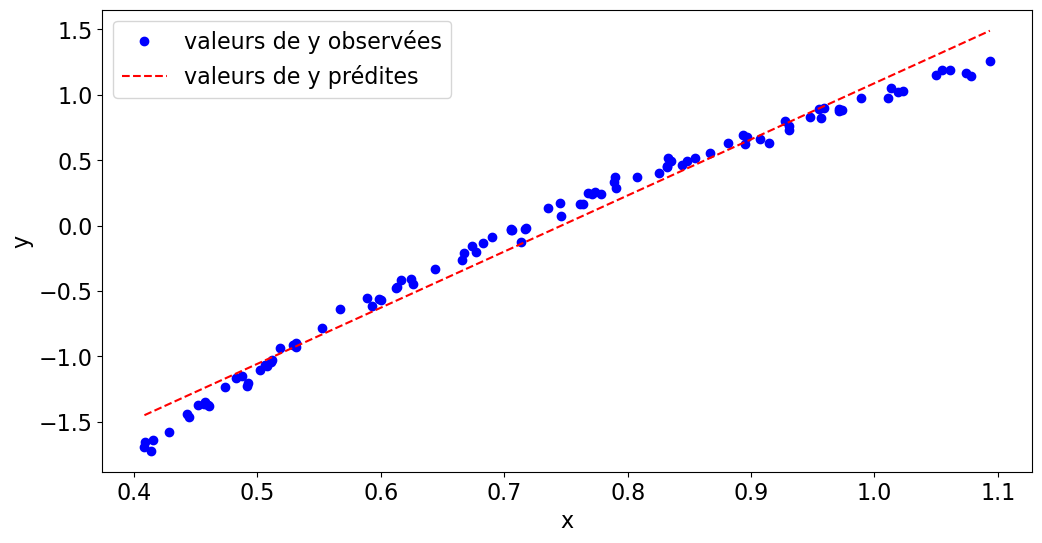

In [10]:
# ajouter le code permettant de tracer Y en fonction de X et y_hat en fonction de X
plot(X,Y,linestyle='', marker='o', color='blue', label='valeurs de y observées')
plot(X,y_hat(a,b,X),linestyle='--', color='red', label='valeurs de y prédites')

# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() # affichage de la légende sur le graphe
savefig("svg-images/Iris2-LinearCorr.png")  # sauvegarde dans un fichier png,
                                            #par exemple pour l'inclure dans un rapport

<div class="warn">

Vous venez en principe de trouver le tracé ci-dessous :
<p style="text-align: center"><img src="./svg-images/Iris2-LinearCorr-saved.png" style="width:700px; margin-left:auto; margin-right:auto" id="img_lincorr2"/></p>   

On voit que la corrélation linéaire ne passe pas au milieu de l'ensemble des points. La fonction semble légèrement concave. Ce type de tracé est **impératif**. Même si c'est subjectif, il permet de porter un regard critique sur l'hypothèse initiale d'une relation linéaire entre $y_i$ et $x_i$, les métriques type MAE ou MSE ou le coefficient de corrélation $R^2$ ne donnant qu'une indication globale et insuffisante.

</div>

##### **5.** Tracé des résidus

**5a.** On va maintenant tracer les résidus. Cette analyse graphique va justement mettre en évidence cette concavité.

La première partie du code consiste à définir une fonction `résidus` qui va dépendre de tableaux `y` et `y_hat`

- tracer les résidus en fonction de `X`
- commenter

(-0.35, 0.35)

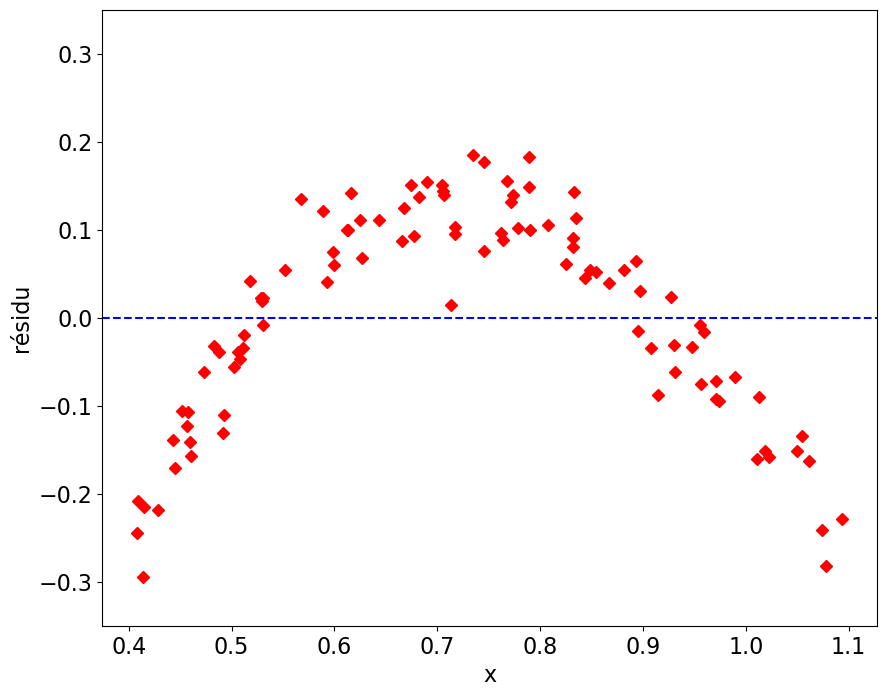

In [11]:
# définition de la fonction y_hat
def residus(y,y_hat):
    return y-y_hat

#on ajuste la taille du graphique
plt.rcParams["figure.figsize"] = (10,8)
# on va tracer une ligne horizontale qui passe par 0 
axhline(y = 0, color = 'b',linestyle='--')

# entrez ci-dessous votre code python pour tracer les résidus en fonction de X
plot(X,residus(Y,y_hat(a,b,X)), linestyle='', marker="D", color='red')

# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlabel("x")
ylabel("résidu")
ylim(-0.35,0.35)

<div class="warn">

La "courbe en cloche" que vous venez de tracer est sans équivoque : les résidus ne sont pas répartis de façon aléatoire autour de zéro. Ils sont structurés. **L'hypothèse d'une relation linéaire entre $y_i$ et $x_i$ est fausse.**

</div>

<div class="rq">
    
**5b.  Question facultative.** Comme dans le notebook de cours associé (**Statistiques et régression**), on veut tracer côte-à-côte le graphe des résidus $e(x_i)$ en fonction des $x_i$ et le graphe de distribution des résidus $e(x_i)$.

La fonction `résidus`, qui dépend des tableaux `y` et `y_hat`, a été déjà définie dans la question précédente.

On recommande de faire un copier/coller à partir du [notebook de cours associé](../Pandas-Stats-Iris2.ipynb).
    
*Vous verrez avec votre enseignant si vous avez le temps de traiter cette question. Si le temps est compté ou si ça vous semble trop compliqué, il vaut mieux passer à la partie suivante.*
    
</div>

(-0.35, 0.35)

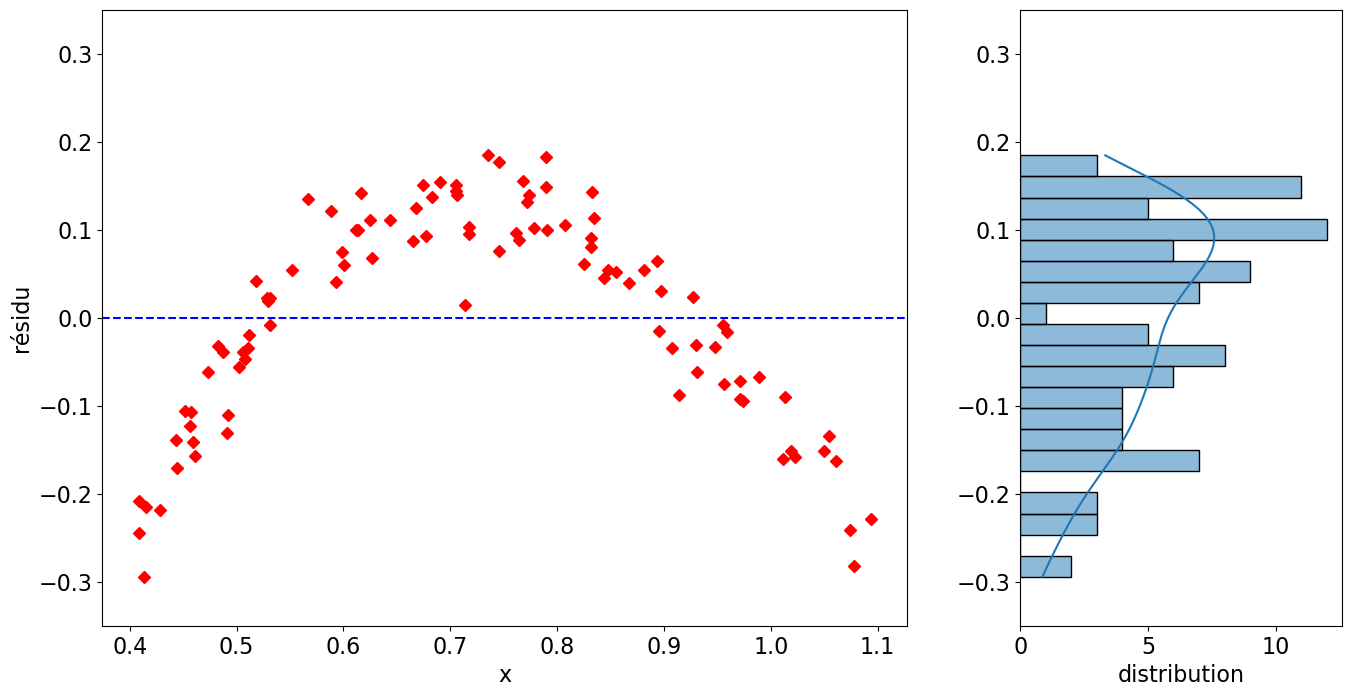

In [12]:
import seaborn as sns
from matplotlib import gridspec
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique

# entrez ci-dessous votre code python
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
limit=0.35
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,y_hat(a,b,X)), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
nbins=20
sns.histplot(y=residus(Y,y_hat(a,b,X)),bins=nbins,kde=True)
plt.ylim(-limit,limit)

#### **Exercice 2.** Régression logarithmique

<div class="rq">
    
On va chercher à ajuster $Y=f(X)$ par une fonction du type $c\times\ln(x)+d$. Il s'agit donc de rechercher une corrélation plus complexe que des fonctions affines ou polynomiales.
    
On va pour cela utiliser la fonction `curve_fit` du module `scipy`.
    
</div>

Pourquoi $c\times\ln(x)+d$ ? Car on sait que les points de l'intervalle \[0,4 - 1,1\] qui vous ont été fournis sont en réalité bien représentés par la loi $3\times\ln(x)+1$, l'écart par rapport à la fonction provenant de l'incertitude de leur mesure. Si on ne prend pas garde à l'échelle choisie, le logarithme népérien dans un intervalle $[x_1,x_2]$ étroit peut ressembler à une fonction linéaire. Après exécution du code python donné ci-dessous, vous pourrez comparer le tracé de $3\times\ln(x)+1$ avec celui des données que vous venez d'étudier.

*NB. On utilise des variables c et d pour ne pas écraser les variables a et b de l'exercice précédent*

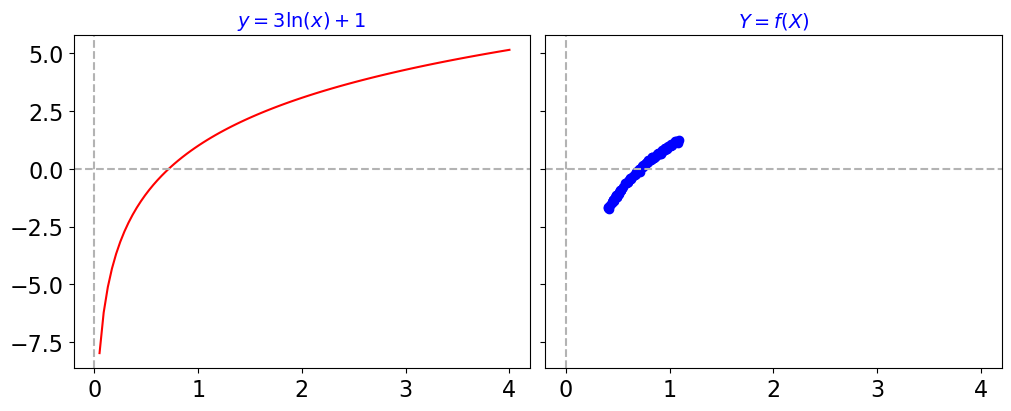

In [13]:
# exécutez cette cellule, sans la modifier
# son rôle est de comparer la fonction 3ln(x)+1 et les données étudiées dans la partie précédente 
mosaic = [[1,2]]
fig, ax = subplot_mosaic(mosaic, constrained_layout=True,figsize=(10,4),sharex=True,sharey=True)

xmin = 0.05
xmax = 4
npt = 100
# génération de npt points équirépartis entre xmin et xmax
x = np.linspace(xmin, xmax, npt)
          
ax[1].plot(x, 3*log(x)+1,color='red')
ax[1].set_title("$y=3\ln(x)+1$", fontsize=14, color="blue")
ax[1].axvline(x = 0, color = '0.7',linestyle='--')
ax[1].axhline(y = 0, color = '0.7',linestyle='--')
          
ax[2].plot(X, Y,color='blue', marker='o', linestyle='')
ax[2].set_title("$Y=f(X)$", fontsize=14, color="blue")
ax[2].axvline(x = 0, color = '0.7',linestyle='--')
ax[2].axhline(y = 0, color = '0.7',linestyle='--')

##### **1.** Définition de la fonction à modéliser et lecture des données

**1.a.** Définir la relation à modéliser ($c\times\ln(x)+d$) sous forme d'une fonction python `fln_hat` qui prend comme arguments la valeur en abscisse, *puis* les coefficients du modèle à déterminer.

In [14]:
# le logarithme népérien de la bibliothèque numpy est appelé log
# La ligne ci-dessous consiste à remplacer l'appel à log par un appel à ln
from numpy import log as ln

# entrez ci-dessous votre code python
def fln_hat(x,c,d):
    return c*ln(x)+d

**1.b.** Même si X et Y ont déjà été initialisés dans l'exercice précédent, on préfère les relire au cas où ils auraient été modifiés par erreur.

In [15]:
# compléter ce code pour ranger les données dans deux tableaux X et Y 
X, Y = np.loadtxt('data/f2.csv', delimiter='\t', unpack=True)

**2.** Utiliser la fonction `curve_fit` du module `scipy` avec comme arguments la fonction python `fln_hat`, et les tableaux `X` et `Y`. Puis afficher les paramètres $c$ et $d$ de la fonction $c\times\ln(x)+d$ qui a été ajustée de façon à passer au plus près de l'ensemble des points expérimentaux. Que pensez-vous du résultat ?

In [16]:
from scipy.optimize import curve_fit

# entrez ci-dessous votre code python
PFit, _ = curve_fit(fln_hat, X, Y)
#affichage des paramètres de la fonction
print(PFit)
#affichage formaté
print(f"{PFit[0]:6.2f}ln(x) + {PFit[1]:6.2f}")

[3.00515984 0.99289292]
  3.01ln(x) +   0.99


<div class="warn">
    
Il était dit dans l'introduction de cet exercice que les données obéissent à la loi $3\times\ln(x)+1$. C'est bien ce qu'on retrouve, à quelques centièmes près, dûs à l'incertitude de la mesure expérimentale.

</div>

##### **3.** Évaluation de la qualité du fit

Calculer et afficher l'erreur moyenne absolue (MAE) ainsi que l'erreur quadratique moyenne (MSE). Comparer aux MAE et MSE calculées dans l'exercice 1. 

In [17]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
# entrez ci-dessous votre code python
c=PFit[0]
d=PFit[1]
print(f"MSE = {MSE(Y,fln_hat(X,c,d)):8.3f}\nMAE ={MAE(Y,fln_hat(X,c,d)):8.3f}")

MSE =    0.001
MAE =   0.029


<div class="warn">
    
Les valeurs sont plus faibles, la régressioon logarithmique semble donc meilleure. **Attention !** Seule une analyse graphique portée avec un regard critique permettra de réellement trancher.
    
Même si ici il n'y a plus de suspense puiqu'on sait que la fonction ajustée est bien celle qui décrit les données, on va quand même jouer le jeu. 

</div>

##### **4.** Évaluation graphique de l'ajustement par une fonction logarithmique

Superposer le tracé des variables mesurées, c'est-à-dire Y en fonction de X, avec le tracé de la fonction  $\hat{y}=c\times\ln(x)+d$ (appelée `fln_hat` dans le code). Pour cela :

- appeler la fonction plot afin de tracer les valeurs observées `Y` en fonction de `X`. On utilisera les options `linestyle='', marker='o', color='blue', label='valeurs de y observées'`.

- appeler à nouveau la fonction plot de façon à superposer les valeurs de y prédites `fln_hat(X,c,d)` pour chacune des 100 variables $x_i$, contenues dans `X`. On utilisera les options `linestyle='--', color='red', label='valeurs de y prédites'`.

- l'hypothèse d'une relation logarithmique entre les $y_i$ et les $x_i$ vous semble-t-elle justifiée ?

- Prédire la valeur de $y$ si $x$ = 0,1



x = 0.1 -> y = -5.93


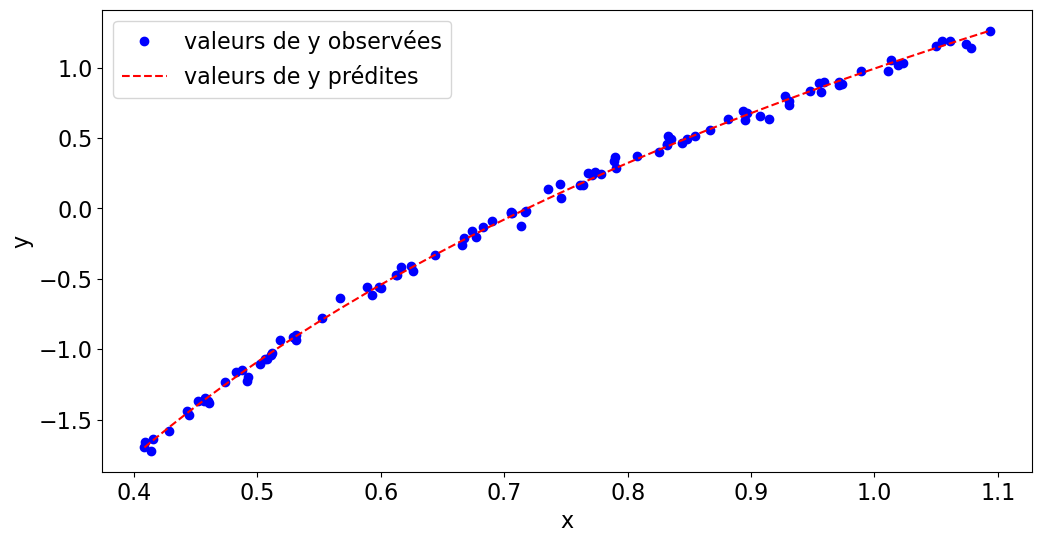

In [18]:
# définition de la dimension du tracé
plt.rcParams["figure.figsize"] = (12,6) #on ajuste la taille du graphique

# ajouter le code permettant de tracer Y en fonction de X et fln_hat en fonction de X
plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs de y observées')
plot(X,fln_hat(X,c,d),linestyle='--', color='red', label='valeurs de y prédites')

# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

# ajouter ici le code pour prédire de la valeur de y pour x = 0,05
print()
print(f"x = 0.1 -> y = {fln_hat(0.1,c,d):.2f}")

<div class="warn">

- La fonction `fln_hat(X)` passe de façon remarquable au plus près de l'ensemble des points $(x_i,y_i)$. On va quand même tracer les résidus par acquit de conscience.
    
- la valeur prédite pour $x$ = 0,1 est très différente de la précédente. Pour se convaincre qu'il n'y a pas d'erreur, on peut superposer la  fonction linéaire `y_hat`, la fonction logarithmique `fln_hat` et enfin les points expérimentaux `Y`. C'est ce qui est fait dans la cellule ci-dessous (*l'exécuter sans la modifier*)

</div>

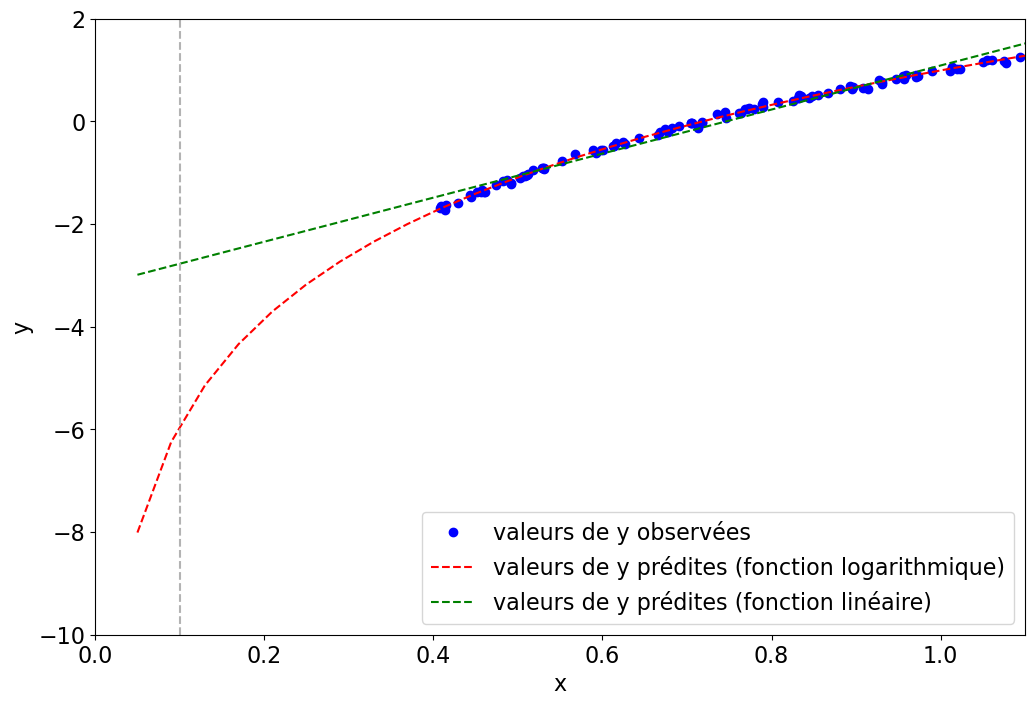

In [19]:
# exécutez cette cellule, sans la modifier
# définition de la dimension du tracé
plt.rcParams["figure.figsize"] = (12,8) #on ajuste la taille du graphique
X2 = np.linspace(xmin, xmax, npt)
# plots
plot(X, Y,linestyle='', marker='o', color='blue', label='valeurs de y observées')
plot(X2,fln_hat(X2,c,d),linestyle='--', color='red', label='valeurs de y prédites (fonction logarithmique)')
plot(X2,y_hat(a,b,X2),linestyle='--', color='green', label='valeurs de y prédites (fonction linéaire)')
axvline(x = 0.1, color = '0.7',linestyle='--')
# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlim(0,1.1)
ylim(-10,2)
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

##### **5.** Tracé des résidus

On va maintenant tracer les résidus. Cette analyse graphique va cette fois-ci mettre en évidence qu'ils n'ont aucune structure.

La première partie du code consiste à définir une fonction `résidus` qui va dépendre de tableaux `y` et `y_hat`. Puis :

- tracer les résidus en fonction de `X`
- commenter

(-0.35, 0.35)

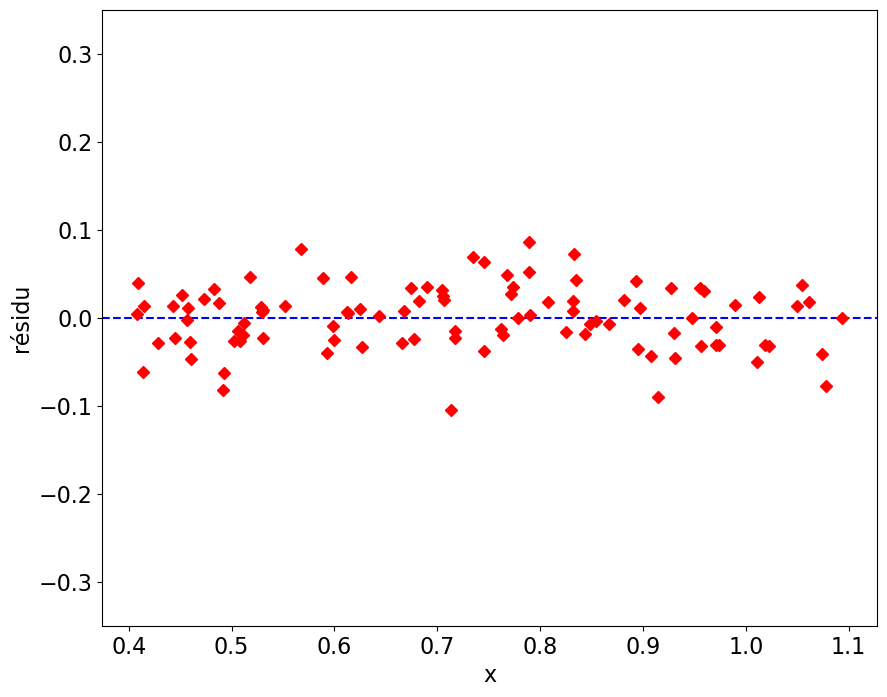

In [20]:
# définition de la fonction y_hat
def residus(y,y_hat):
    return y-y_hat

#on ajuste la taille du graphique
plt.rcParams["figure.figsize"] = (10,8)
# on va tracer une ligne horizontale qui passe par 0 
axhline(y = 0, color = 'b',linestyle='--')

# entrez ci-dessous votre code python pour tracer les résidus en fonction de X
plot(X,residus(Y,fln_hat(X,c,d)), linestyle='', marker="D", color='red')

# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlabel("x")
ylabel("résidu")
ylim(-0.35,0.35)

<div class="rq">
    
##### **6.** Question bonus

On vous donne le code ci-dessous, qui permet de tracer côte-à-côte le graphe des résidus $e(x_i)$ en fonction des $x_i$ et le graphe de distribution des résidus $e(x_i)$.

L'exécuter et le commenter.
    
</div>

(-0.2, 0.2)

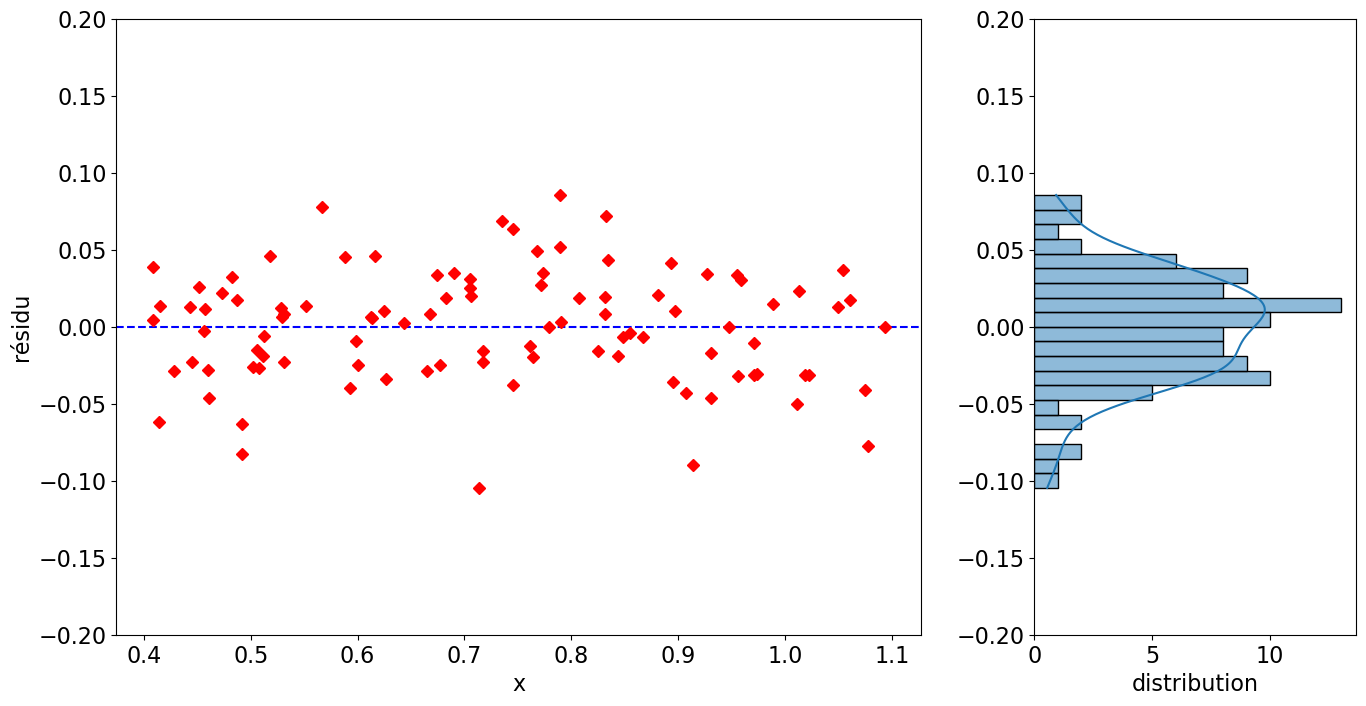

In [21]:
# exécutez cette cellule, sans la modifier
import seaborn as sns
from matplotlib import gridspec # c'est pour un joli affichage de deux graphiques côte-à-côte : les résidus & leur distribution statistique
nbins=20
limit=0.2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 2, width_ratios=[2.5, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(X,residus(Y,fln_hat(X,c,d)), linestyle='', marker="D", color='red')
xlabel("x")
ylabel("résidu")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("x")
xlabel("distribution")
sns.histplot(y=residus(Y,fln_hat(X,c,d)),bins=nbins,kde=True)
plt.ylim(-limit,limit)

<div class="warn">

- les erreurs sont dispersées autour de 0, sans présenter de structure particulière

- leur distribution est centrée en 0, et elle a globalement l'allure d'une gaussienne. En d'autres termes, les résidus possèdent les propriétés d’une distribution normale : courbe « en cloche », symétrique autour de 0, avec un aplatissement régulier des extrémités

</div>

#### **Exercice 3.** Régression d'un polynôme non bruité d'ordre 3

##### **1.** Lecture des données

On va d'abord lire à l'aide de la fonction `loadtxt` le contenu d'un fichier `fpolNoNoise.csv`, qui est contenu dans le répertoire `data` (son chemin d'accès est donc `data/fpolNoNoise.csv`). Le fichier contient 100 couples de données  $x_i$ et $y_i$, rangés dans deux colonnes séparées par une marque de tabulation.
- le contenu des deux colonnes va être stocké dans deux variables `X3` et `Y3`.
- on va ensuite tracer `Y3` en fonction de `X3` avec les options `linestyle='', marker='o'` 

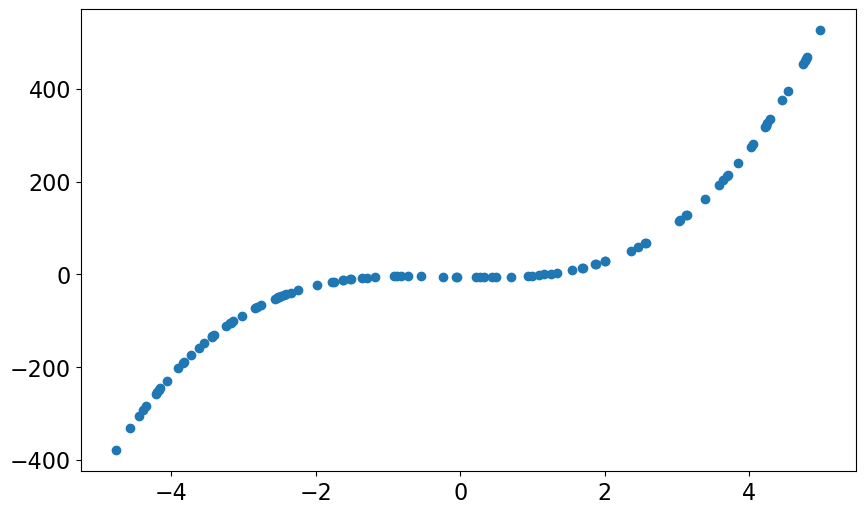

In [22]:
# corrigez le code python de la ligne ci-dessous
X3, Y3 = np.loadtxt('data/fpolNoNoise.csv', delimiter='\t', unpack=True)
#if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)

# ne pas changer la ligne ci-dessous
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique

# entrez ci-dessous votre code python pour tracer Y3 en fonction de X3
plt.plot(X3, Y3,linestyle='', marker='o')

##### **2.** Régression polynomiale

Les points semblent suivre une loi polynomiale d'ordre 3, avec une incertitude expérimentale très faible. On va utliser la fonction `polyfit` de la bibliothèque `numpy`. Elle a comme paramètres les tableaux `X3` et `Y3`, suivi de l'ordre du polynôme. Elle retourne un tableau qui contient les coefficients du polynôme.

- Après avoir appliqué `polyfit`, afficher les paramètres du polynôme.

- Quelle est l'équation de la fonction polynomiale ? 

In [24]:
# On appellera ici la routine polyfit avec les valeurs de X & Y, ainsi que l'ordre du polynôme.
# Elle va renvoyer les coefficients a, b, c, & d du polynôme, stockés dans la liste PFit5
PFit3 = np.polyfit(X3, Y3, 3)
print(type(PFit3))

# afficher ci-dessous les paramètres du polynôme
print(PFit3)

#affichage formaté de la fonction polynomiale
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

<class 'numpy.ndarray'>
[ 4.  2. -3. -6.]
  4.00x^3 +   2.00x^2 +  -3.00x +  -6.00


##### **3.** Évaluation de la qualité du fit

Calculer et afficher l'erreur moyenne absolue (MAE) ainsi que l'erreur quadratique moyenne (MSE). Commenter. 

*Astuce*. La fonction `poly1d` de la bibliothèque `numpy` est bien utile, elle permet de définir une fonction polynomiale à partir des coefficients optimisés par `polyfit`. Soit PFit le tableau qui contient les coefficients du polynôme. `P_hat  = np.poly1d(PFit)` renvoie une fonction polynomiale. Avant de calculer MAE et MSE, on affichera la fonction polynomiale.

In [25]:
#inutile de faire des copier/coller des valeurs de a, b, c, d. On va utiliser directement poly1d,
# en lui passant PFit3 en paramètre
P3_hat  = np.poly1d(PFit3)
print(P3_hat)

# entrez ci-dessous votre code python pour calculer MAE et MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y3,P3_hat(X3)):8.3f}\nMAE ={MAE(Y3,P3_hat(X3)):8.3f}")

   3     2
4 x + 2 x - 3 x - 6
MSE =    0.000
MAE =   0.000


<div class="warn">

L'incertitude expérimentale semble effectivement nulle.

</div>

##### **4.** Évaluation graphique de l'ajustement par une fonction polynomiale

Superposer le tracé des variables mesurées, c'est-à-dire Y en fonction de X, avec le tracé de la fonction  $\hat{P}_3(x)=ax^3+bx^2+cx+d$ (appelée `P3_hat` dans le code). Pour cela :

- appeler la fonction plot afin de tracer les valeurs observées `Y3` en fonction de `X3`. On utilisera les options `linestyle='', marker='o', color='blue', label='valeurs de y observées'`.

- appeler à nouveau la fonction plot de façon à superposer les valeurs de y prédites `fln_hat(X,c,d)` pour chacune des 100 variables $x_i$, contenues dans `X`. On utilisera les options `linestyle='--', color='red', label='valeurs de y prédites'`.

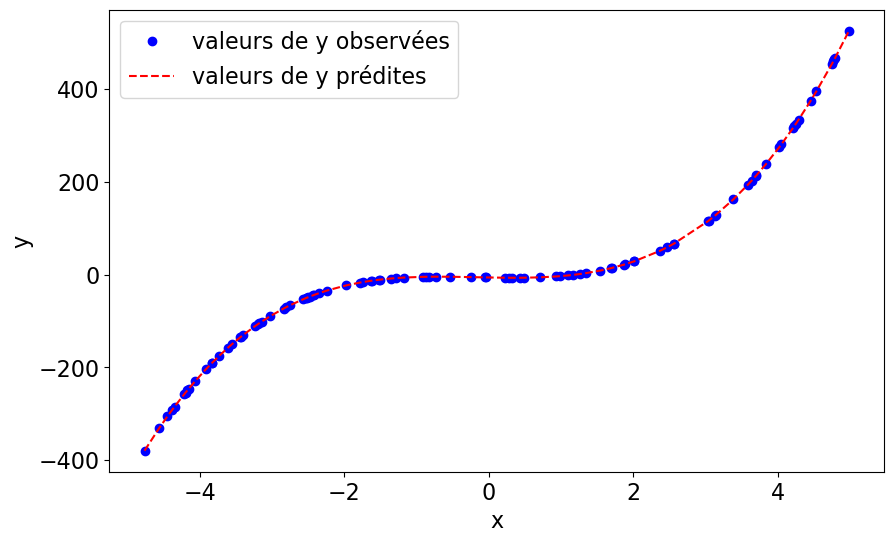

In [26]:
# tracé des points
plot(X3, Y3,linestyle='', marker='o', color='blue', label='valeurs de y observées')
plot(X3, P3_hat(X3),linestyle='--', color='red', label='valeurs de y prédites')
xlabel("x") # label de l'axe des abscisses
ylabel("y") # label de l'axe des ordonnées
legend() #affichage de la légende sur le graphe

##### **5.** Tracé des résidus

On va maintenant tracer les résidus en fonction de `X`. Commenter.

(-0.01, 0.01)

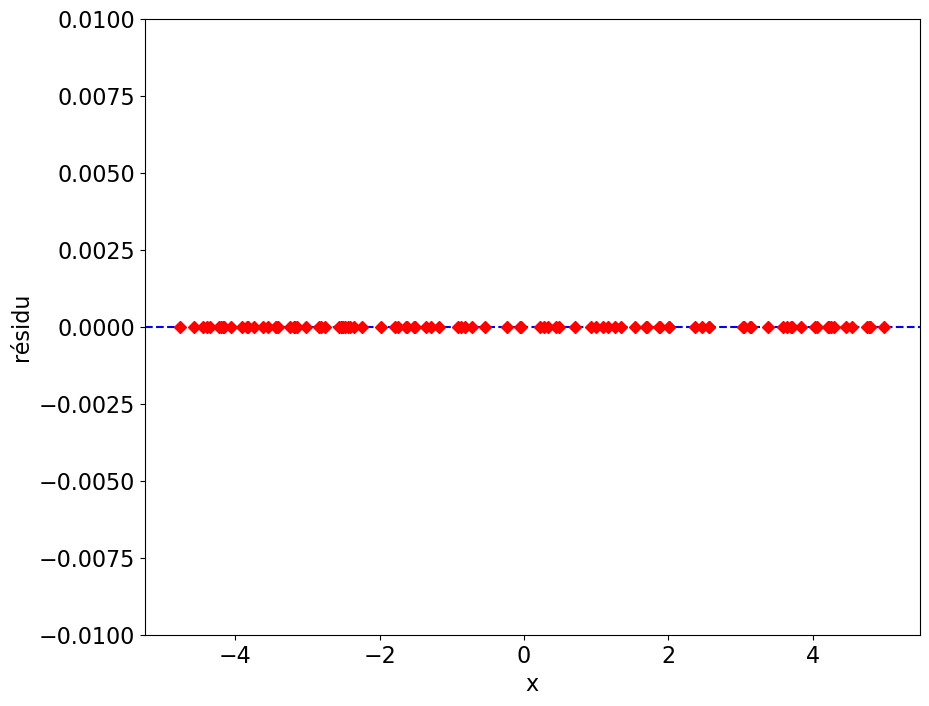

In [27]:
# définition de la fonction y_hat
def residus(y,y_hat):
    return y-y_hat

#on ajuste la taille du graphique
plt.rcParams["figure.figsize"] = (10,8)
# on va tracer une ligne horizontale qui passe par 0 
axhline(y = 0, color = 'b',linestyle='--')

# entrez ci-dessous votre code python pour tracer les résidus en fonction de X
plot(X3,residus(Y3,P3_hat(X3)), linestyle='', marker="D", color='red')

# options du tracé. Rien à modifier dans ces lignes, que vous pouvez néanmoins analyser
xlabel("x")
ylabel("résidu")
ylim(-0.01,0.01)

<div class="warn">

L'incertitude expérimentale semble effectivement nulle. Le *fit* est parfait.

</div>

In [28]:
vID.end(cwd0)

**Fin à:** Thursday 03 November 2022, 17:10:57  
**Durée:** 00:03:04 252ms

<p style="text-align: center"><img width="800px" src="../config/svg/logoFin.svg" style="margin-left:auto; margin-right:auto"/></p>